In [ ]:
# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도


In [ ]:
#버전과 위치정보
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

3.2.2
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib


In [ ]:
# 시스템에 설치된 폰트 확인. 
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 27
['/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '

In [ ]:
#없다면 install
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

In [ ]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf']

In [ ]:
#Matplotlib 한글폰트 지정 
#Colab

!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpatch = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname = fontpatch, size = 10)
fm._rebuild()

#그래프에 retina display 적용 # 맥북 아니면 굳이 안해도 됨
%config InlineBackend.figure_format = 'retina'

#Colab 한글 폰트 설정
plt.rc('font', family = 'NanumBarunGothic')

In [ ]:
#jupyther Matplotlib 한글 폰트 지정
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats, display
from cycler import cycler

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
  rc('font', family - "AppleGothic")
elif platform.system() == 'Windows':
  path = "c:/Windows/Fonts/malgun.ttf"
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font', familu = font_name)
else:
  print('Unknown system... sorry~~~')

Unknown system... sorry~~~


---
### Setting


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import os

In [ ]:
os.listdir()

['.config', 'sample_data']

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving califonia.png to califonia.png
Saving housing.csv to housing.csv


In [ ]:
uploaded

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
os.listdir()

['.config', 'califonia.png', 'housing.csv', 'sample_data']

In [ ]:
#CSV 파일 읽기

In [ ]:
df = pd.read_csv( './housing.csv', sep = ',')
housing = df

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


___
### 1. 문제정의
- 우리의 목적은 집 가격을 예측하는 것
- median_house_value = Target value

---
- target value(y) = median house value
- feature(X) = long, lat, housing_age, rooms, bedrooms, population, households, median_income, ocean_proximity
---
- supervised
  - data 연속형 >> Regression
- 오프라인

In [ ]:
# 데이터 타입, col개수
# non-null => 결측치(Missing Value) 파악
# 여기선 total_bedroom 결측치 있는 걸 확인 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


___
### 2. EDA (Exploratory Data Analysis)
(여기선 EDA를 train_test_split보다 먼저했음)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95b69d5da0>,
      dtype=object)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


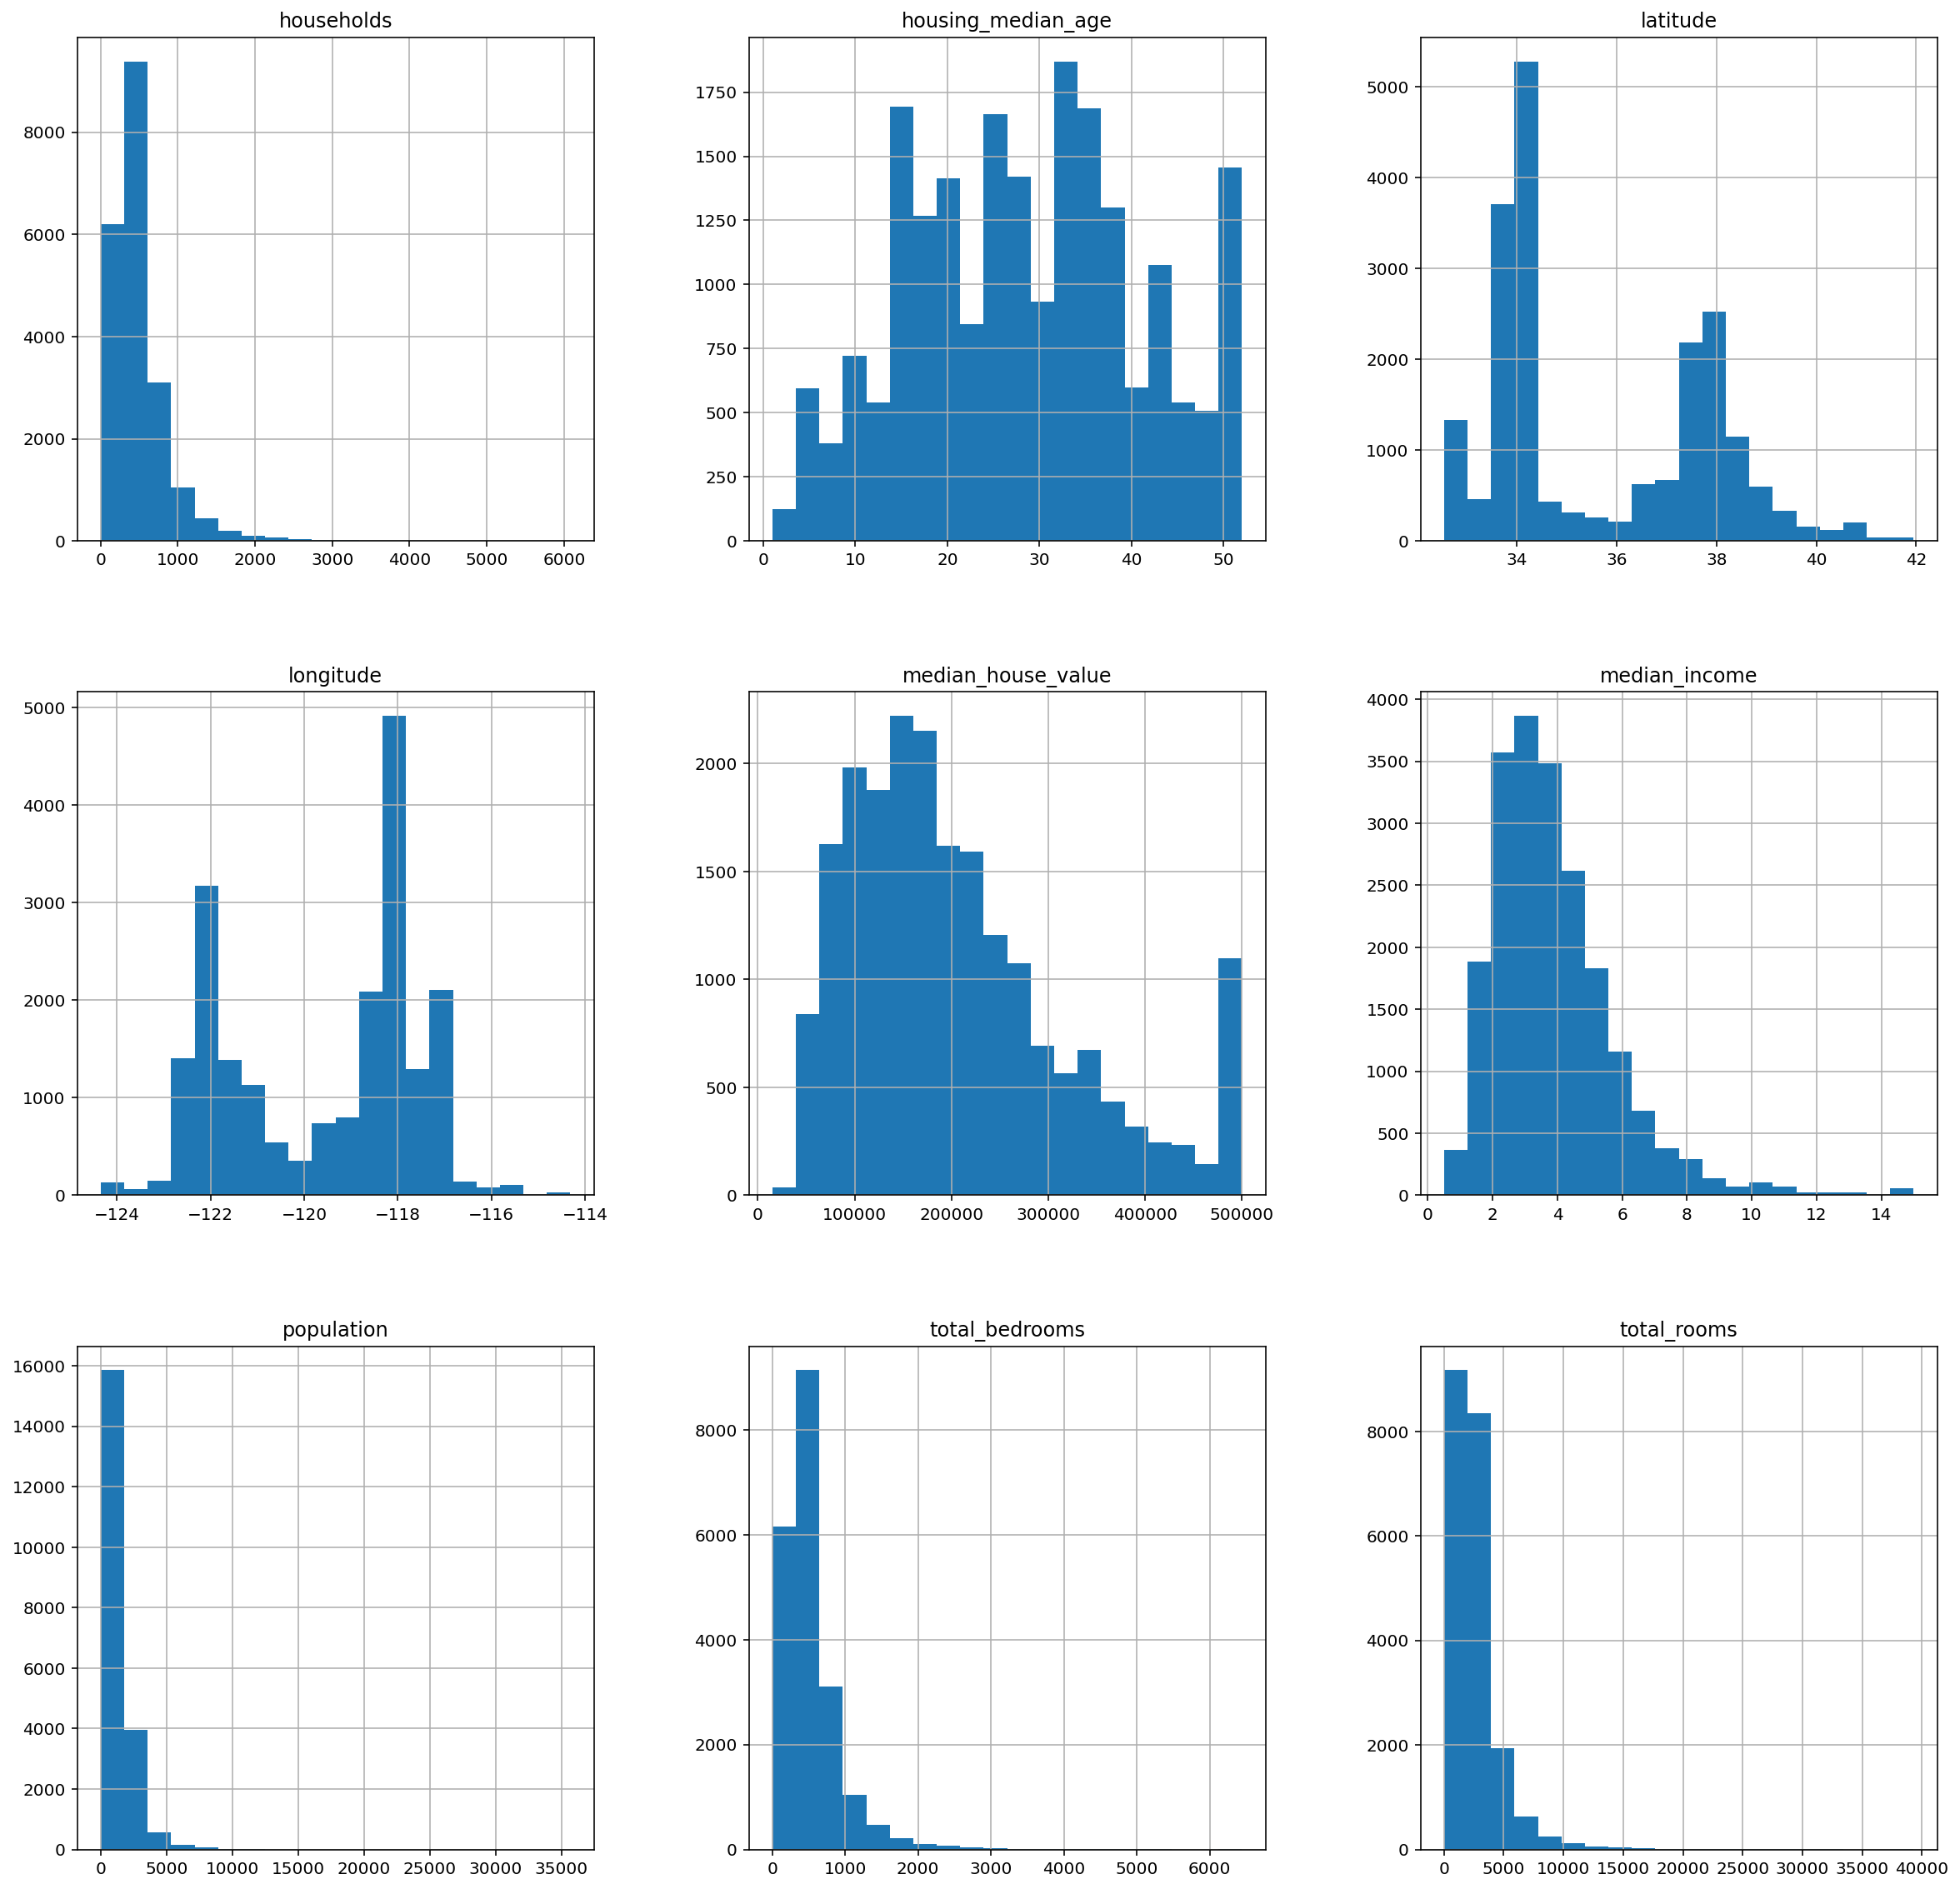

In [ ]:
# plt.figure(figsize=(20,20)) colab에선 작동X
housing.hist(figsize=(20,20), bins = 20)

((array([-3.98611384, -3.7703327 , -3.65227474, ...,  3.65227474,
          3.7703327 ,  3.98611384]),
  array([ 14999.,  14999.,  14999., ..., 500001., 500001., 500001.])),
 (110243.23228096718, 206855.8169089148, 0.9551960798030745))

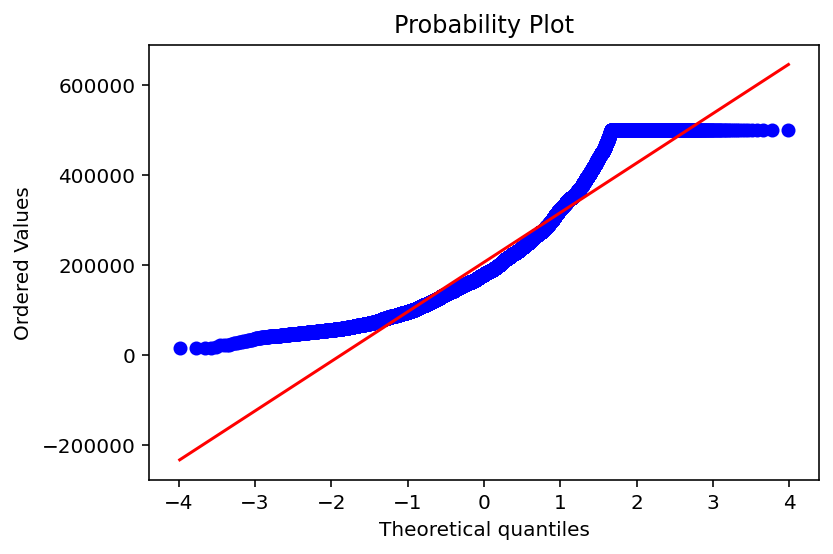

In [ ]:
# target value 분포 확인 

from scipy import stats #Numpy 비슷한 수치 분석 패키지 

stats.probplot(housing['median_house_value'], plot = plt)

# 특정 분위수마다의 데이터 분포를 볼 수 있고, 데이터를 관통하는 하나의 선(regression plot)을 그림
# 데이터의 값이 올라가다가 특정지점에서 일직선 이다 
# => 아, 위에 데이터를 자르고 하나로 통일시켰구나! 

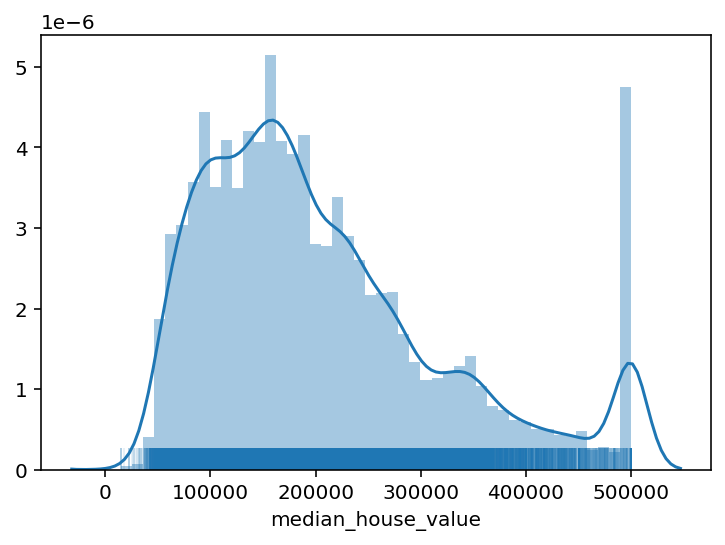

In [ ]:
sns.distplot(housing['median_house_value'], rug=True, rug_kws={'alpha' : 0.1})

# rug: 그래프 밑부분에 있는 분포 막대 

Text(0, 0.5, 'median_house_value')

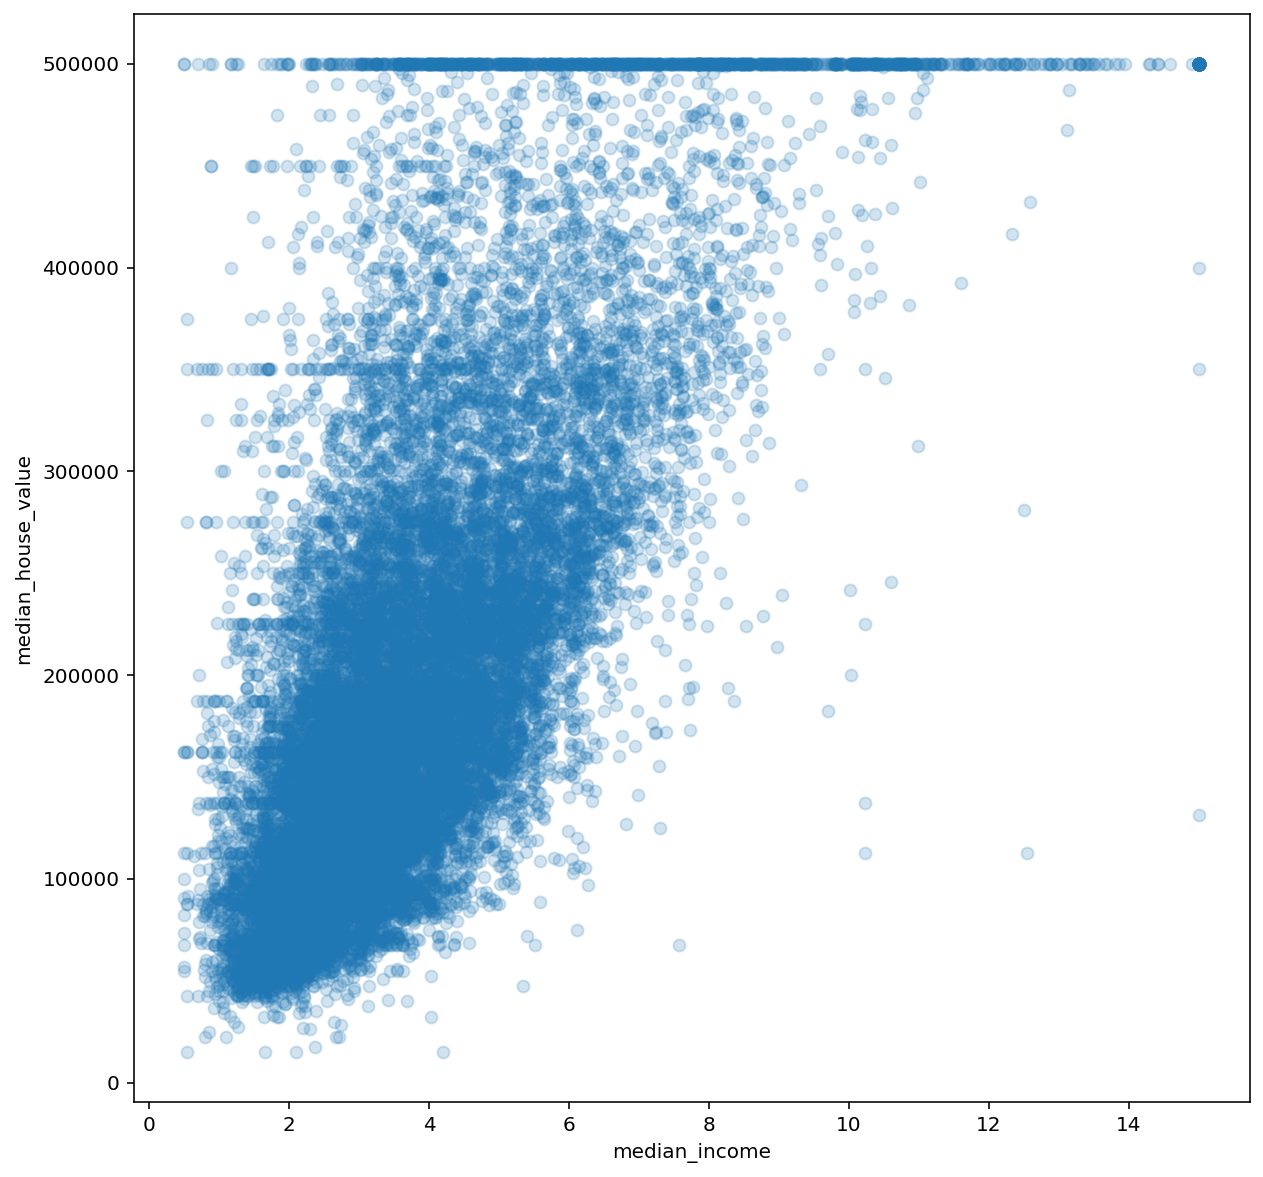

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(housing["median_income"], housing['median_house_value'], alpha = 0.2)
plt.xlabel('median_income')
plt.ylabel('median_house_value')

In [ ]:
plt.figure(figsize = (30,30))
sns.pairplot(housing, corner = True)

# 각 feature 간에 상관관계를 한눈에 파악하기 좋음
# 대각선으로 대칭
# 같은 특성 간에 상관관계는 의미가 없으므로 histogram이 출력

Output hidden; open in https://colab.research.google.com to view.

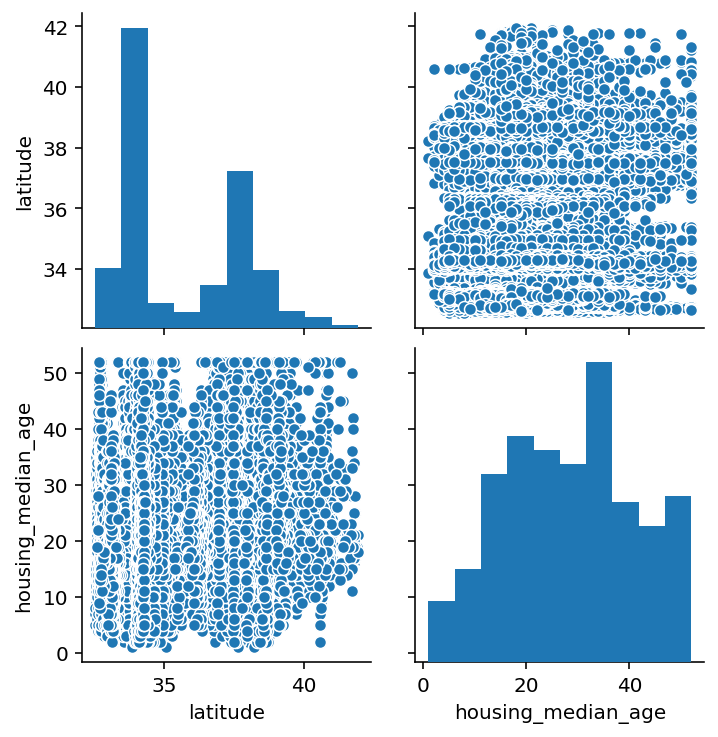

In [ ]:
g = sns.pairplot(housing.iloc[:,[1,2]])

### 3.Train-Test Split

##### Random split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = housing.drop('median_house_value', axis =1)
y = housing['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 9), (4128, 9), (16512,), (4128,))

In [ ]:
X_train['ocean_proximity'].value_counts(), X_test['ocean_proximity'].value_counts()

(<1H OCEAN     7341
 INLAND        5227
 NEAR OCEAN    2086
 NEAR BAY      1854
 ISLAND           4
 Name: ocean_proximity, dtype: int64, <1H OCEAN     1795
 INLAND        1324
 NEAR OCEAN     572
 NEAR BAY       436
 ISLAND           1
 Name: ocean_proximity, dtype: int64)

##### Stratified Split

In [ ]:
housing.corr()['median_house_value'].abs().sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64

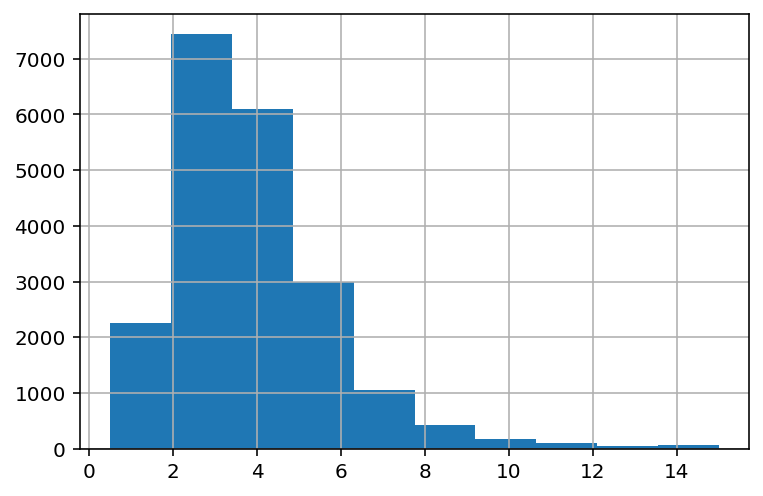

In [ ]:
# Median income의 영향력이 커보임
# Train과 Test set에 Median Income의 분포가 동일하도록 분리하고 싶다면?

# Median Income의 분포를 파악하자
housing['median_income'].hist()

In [ ]:
housing['median_income'].value_counts()

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
           ..
4.1514      1
1.2614      1
2.0294      1
6.7079      1
3.7306      1
Name: median_income, Length: 12928, dtype: int64

In [ ]:
# 연속형을 카테고리화 시켜서 Split의 기준으로 삼자

housing['median_income_rank'] = np.ceil(housing['median_income']) #올림
housing['median_income_rank'].value_counts().sort_index()

1.0      159
2.0     2298
3.0     4946
4.0     5150
5.0     3598
6.0     2127
7.0     1163
8.0      509
9.0      283
10.0      99
11.0     150
12.0      45
13.0      34
14.0      22
15.0       8
16.0      49
Name: median_income_rank, dtype: int64

In [ ]:
housing['median_income_rank'].where(housing['median_income_rank']<10, 10, inplace = True)

In [ ]:
housing['median_income_rank'].value_counts().sort_index()

1.0      159
2.0     2298
3.0     4946
4.0     5150
5.0     3598
6.0     2127
7.0     1163
8.0      509
9.0      283
10.0     407
Name: median_income_rank, dtype: int64

In [ ]:
X = housing.drop('median_house_value', axis =1)
y = housing['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42, stratify = X['median_income_rank']
)

In [ ]:
origin_ratio = (housing['median_income_rank'].value_counts() / len(housing)).sort_index()
origin_ratio

1.0     0.007703
2.0     0.111337
3.0     0.239632
4.0     0.249516
5.0     0.174322
6.0     0.103052
7.0     0.056347
8.0     0.024661
9.0     0.013711
10.0    0.019719
Name: median_income_rank, dtype: float64

In [ ]:
train_ratio = (X_train['median_income_rank'].value_counts() / len(X_train )).sort_index()
train_ratio

origin_ratio - train_ratio

# Median_income의 분포는 큰 차이가 없음

1.0     0.000016
2.0    -0.000032
3.0    -0.000032
4.0     0.000032
5.0    -0.000032
6.0     0.000016
7.0     0.000016
8.0    -0.000016
9.0     0.000016
10.0    0.000016
Name: median_income_rank, dtype: float64

In [ ]:
X_train['ocean_proximity'].value_counts(), X_test['ocean_proximity'].value_counts()

#여긴 test에 아예 island가 없음
# stratify 기준 feature가 아닌 것들은 보장 못함

(<1H OCEAN     6745
 INLAND        4996
 NEAR OCEAN    2005
 NEAR BAY      1729
 ISLAND           5
 Name: ocean_proximity, dtype: int64, <1H OCEAN     2391
 INLAND        1555
 NEAR OCEAN     653
 NEAR BAY       561
 Name: ocean_proximity, dtype: int64)

In [ ]:
# 데이터 copy

#만들었던 칼람 지우고 원본 저장
housing.drop('median_income_rank', axis = 1, inplace = True)

In [ ]:
housing_origin = housing.copy()

In [ ]:
# Train set 만 새로 houing으로 copy
housing = X_train.copy()
housing.shape

(15480, 10)

In [ ]:
housing_origin.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_income_rank'],
      dtype='object')

In [ ]:
housing['median_house_value'] = y_train

### 본격적 EDA

<Figure size 720x720 with 0 Axes>

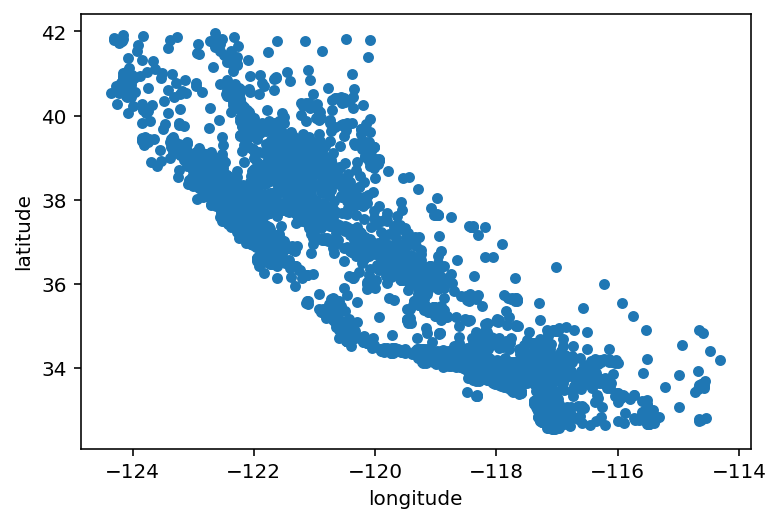

In [ ]:
plt.figure(figsize = (10,10))
housing_plot = housing.plot(kind='scatter', x='longitude', y = 'latitude')


In [ ]:
housing = pd.DataFrame(X_train)
housing['median_house_value'] = y_train

<Figure size 1440x1440 with 0 Axes>

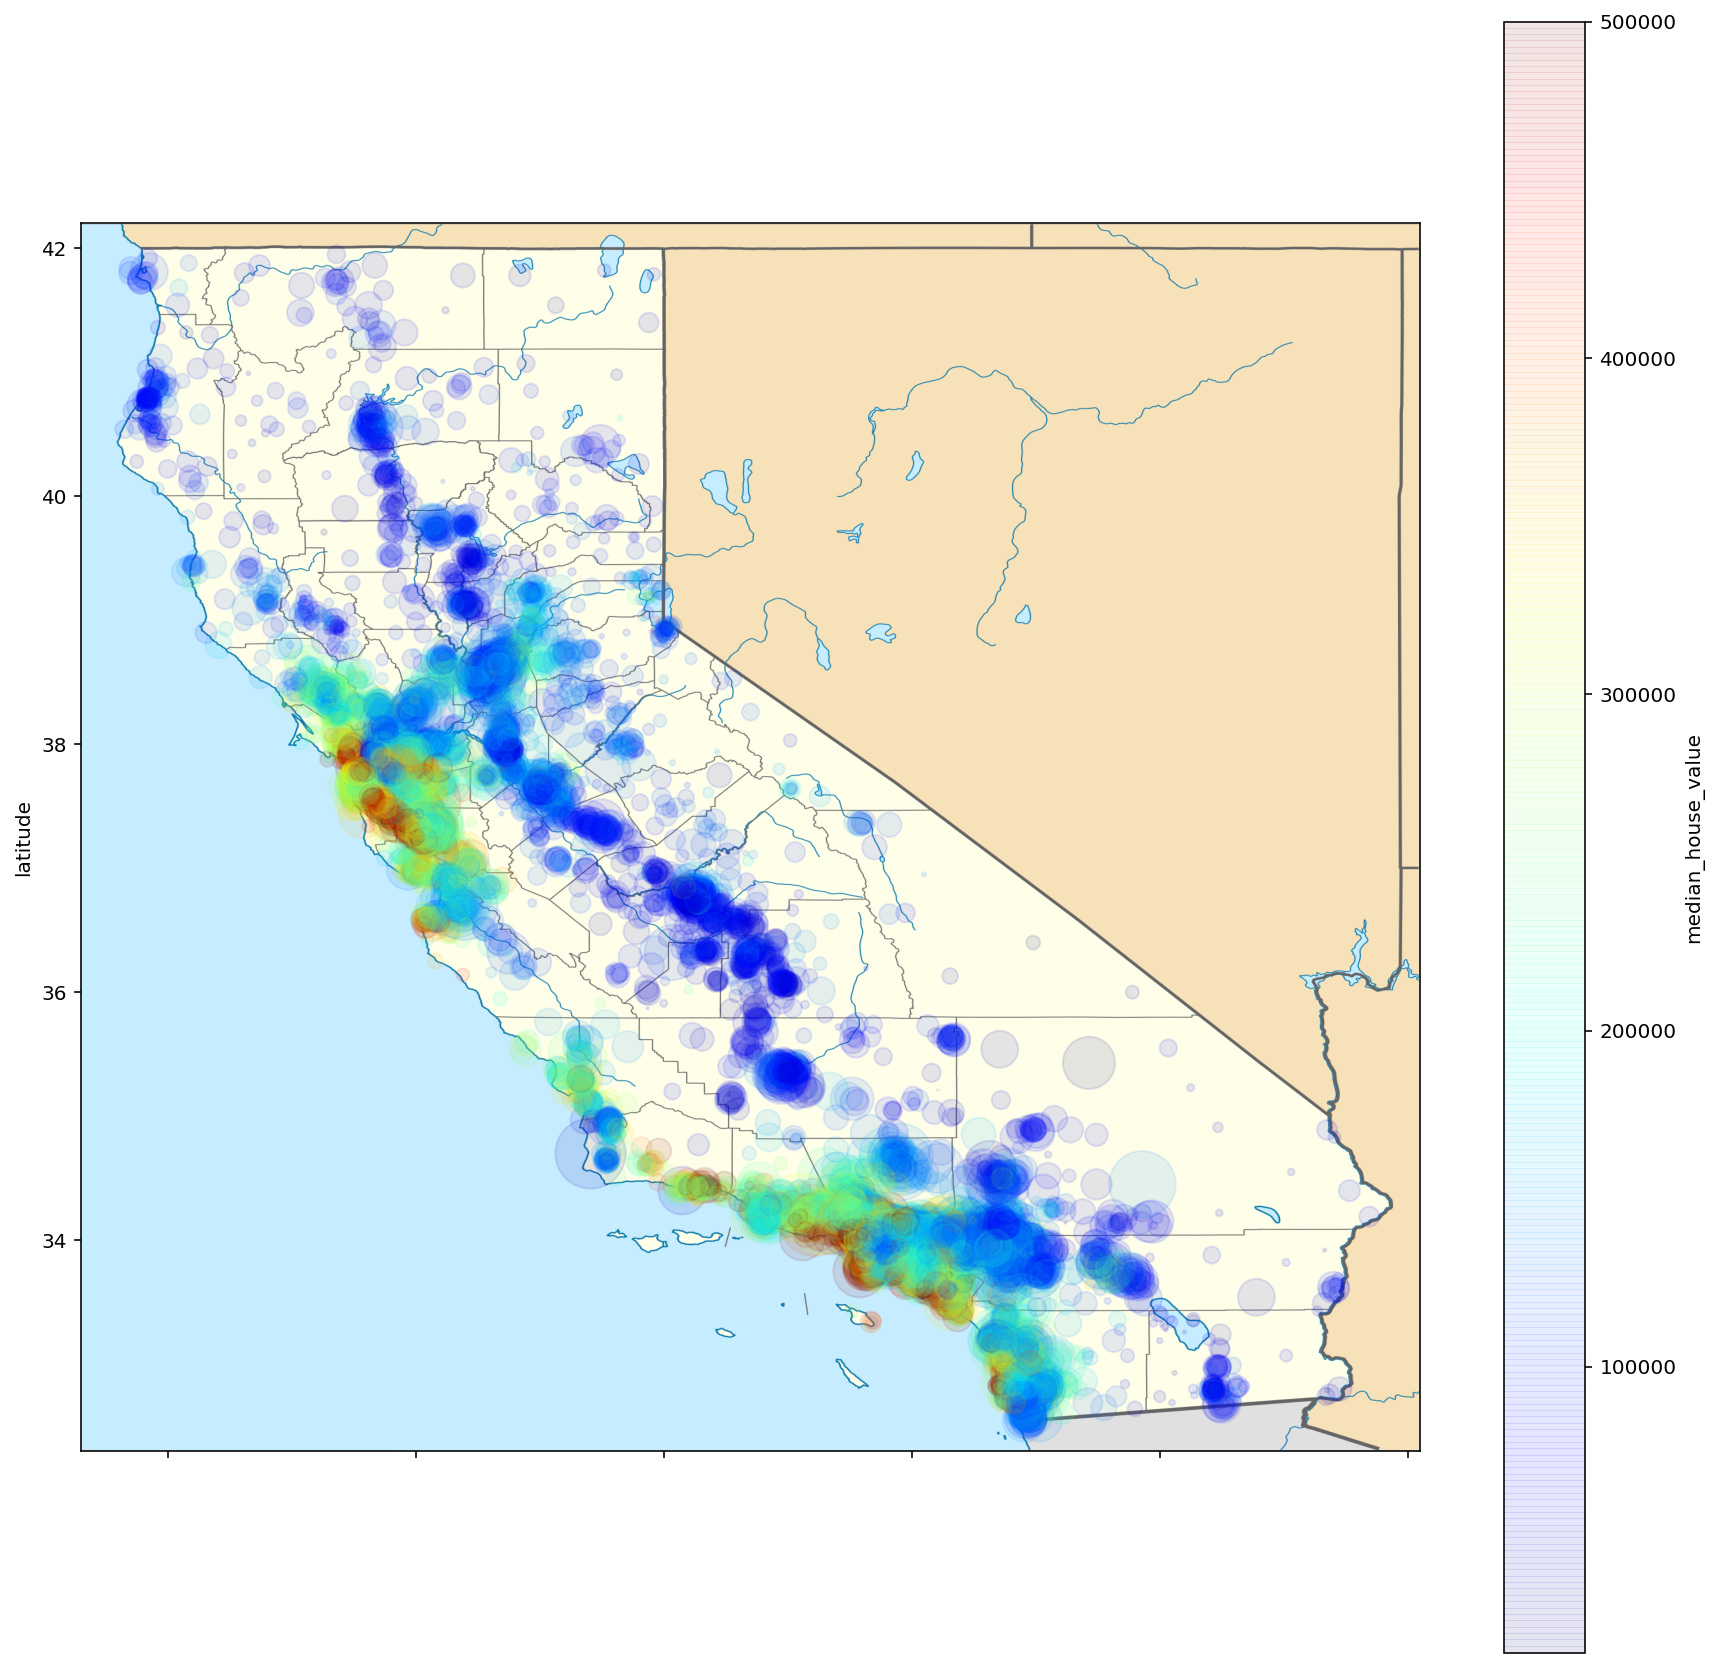

In [ ]:
import matplotlib.image as mpimg
plt.figure(figsize=(20,20))

map_img = mpimg.imread('./califonia.png')

housing_lot = housing.plot(kind = 'scatter', x='longitude', y='latitude',
                           s=housing['population'] / 10,
                           c = 'median_house_value',
                           cmap = plt.get_cmap('jet'),
                           figsize = (15,15), alpha = 0.1)
plt.imshow(map_img, extent = [-124.7, -113.9, 32.3, 42.2])
plt.show()

In [ ]:
housing.head()
housing.drop('median_income_rank', axis = 1, inplace = True)

___
### 4.Data Preparation

데이터 전처리: 데이터를 머신러닝 알고리즘에 넣기 위해 준비하는 과정
목표: 학습을 잘 하는 것   
(1) 무사히 학습을 잘 끝내는 것(정확도 포함..)  
(2) 학습속도가 빨라야 함

#### (1) 결측치 처리 

- Nan값이 있는 열을 삭제 
  - 데이터가 아까워서 잘 안 씀
- Nan값이 있는 행을 삭제
- 결측치에 '데이터의 특성에 맞는' 대체값을 넣어줌
  - 평균, 미디안, max, min, 0, 최빈값 etc

##### 결측치 처리_ 직접 하기

In [ ]:
# 결측치 있는 열 삭제
# housing.drop('total_bedrooms', axis = 1)
housing.dropna(axis = 1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 9902 to 20482
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15480 non-null  float64
 1   latitude            15480 non-null  float64
 2   housing_median_age  15480 non-null  float64
 3   total_rooms         15480 non-null  float64
 4   population          15480 non-null  float64
 5   households          15480 non-null  float64
 6   median_income       15480 non-null  float64
 7   ocean_proximity     15480 non-null  object 
 8   median_house_value  15480 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


In [ ]:
#결측치 행 삭제
housing.dropna(axis =0).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15334 entries, 9902 to 20482
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15334 non-null  float64
 1   latitude            15334 non-null  float64
 2   housing_median_age  15334 non-null  float64
 3   total_rooms         15334 non-null  float64
 4   total_bedrooms      15334 non-null  float64
 5   population          15334 non-null  float64
 6   households          15334 non-null  float64
 7   median_income       15334 non-null  float64
 8   ocean_proximity     15334 non-null  object 
 9   median_house_value  15334 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [ ]:
#대체값 넣어주기 (Median; scale 차이가 많이 나서)

housing.describe() #결측치 있는 col찾기

#지금은 total_bedrooms만 결측치가 있지만, 추후에 수집할 데이터에는 다른 열에 nan값이 생길 수도 있음
# 즉 전체를 다 바꿔야 함

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15480.000000,15480.000000,15480.000000,15480.000000,15334.000000,15480.000000,15480.000000,15480.000000,15480.000000
mean,-119.592174,35.661287,28.684755,2622.461563,534.918873,1413.539083,496.246059,3.870908,206259.116021
std,2.008460,2.145922,12.595153,2163.788201,416.257526,1092.989687,377.662311,1.891739,115554.739065
min,-124.350000,32.550000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.810000,33.940000,18.000000,1447.750000,295.000000,785.000000,279.000000,2.563850,118375.000000
50%,-118.540000,34.270000,29.000000,2119.000000,432.000000,1158.000000,407.000000,3.543550,179100.000000
75%,-118.010000,37.730000,37.000000,3120.000000,642.750000,1711.000000,599.000000,4.748350,263800.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100,500001.000000


In [ ]:
#housing 전체 median
median_values = housing.median(axis = 0) # axis 헷갈리면 둘다 해보기
median_values

longitude               -118.54000
latitude                  34.27000
housing_median_age        29.00000
total_rooms             2119.00000
total_bedrooms           432.00000
population              1158.00000
households               407.00000
median_income              3.54355
median_house_value    179100.00000
dtype: float64

In [ ]:
# 중위값은 Numerical data만 나오지만, 전체 데이터에는 범주형도 있음
# 올바르게 넣어주기 위해 numerical 데이터만 분리
housing.info()

numerical_columns = housing.drop('ocean_proximity', axis = 1).columns
numerical_columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 9902 to 20482
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15480 non-null  float64
 1   latitude            15480 non-null  float64
 2   housing_median_age  15480 non-null  float64
 3   total_rooms         15480 non-null  float64
 4   total_bedrooms      15334 non-null  float64
 5   population          15480 non-null  float64
 6   households          15480 non-null  float64
 7   median_income       15480 non-null  float64
 8   ocean_proximity     15480 non-null  object 
 9   median_house_value  15480 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
#housing의 nummerical col들의 전체 row들 중, 결측값을 미디안으로 채워라 
housing.loc[:, numerical_columns].fillna(median_values)

#확인
housing.loc[:, numerical_columns].fillna(median_values).info

<bound method DataFrame.info of        longitude  latitude  ...  median_income  median_house_value
9902     -122.27     38.28  ...         2.6618            136200.0
10351    -117.68     33.63  ...         3.9290            143100.0
1600     -122.12     37.89  ...         4.1250            257100.0
16549    -121.23     37.81  ...         5.5591            149300.0
4096     -118.41     34.15  ...         4.1656            364700.0
...          ...       ...  ...            ...                 ...
19260    -122.74     38.45  ...         4.0798            179200.0
18894    -122.24     38.13  ...         4.0938            126900.0
20363    -118.95     34.16  ...         6.5410            291500.0
9723     -121.76     36.83  ...         3.6693            211000.0
20482    -118.72     34.28  ...         5.4459            223900.0

[15480 rows x 9 columns]>

##### Sklearn(scikit learn) 활용 결측치 처리

딥러닝을 제외하면 머신러닝의 거의 대부분 sklearn이 커버해줌

In [ ]:
from sklearn.impute import SimpleImputer

#Simple imputer는 클래스라서, 인스턴스 하나 만들어주기
imputer = SimpleImputer(strategy = 'median')

In [ ]:
imputer.fit(housing[numerical_columns]) #fit은 파라미터를 구하기 위한 메서드
imputer.statistics_

array([-1.18540e+02,  3.42700e+01,  2.90000e+01,  2.11900e+03,
        4.32000e+02,  1.15800e+03,  4.07000e+02,  3.54355e+00,
        1.79100e+05])

In [ ]:
housing.info() #아직은 결측치 안바뀜

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 9902 to 20482
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15480 non-null  float64
 1   latitude            15480 non-null  float64
 2   housing_median_age  15480 non-null  float64
 3   total_rooms         15480 non-null  float64
 4   total_bedrooms      15334 non-null  float64
 5   population          15480 non-null  float64
 6   households          15480 non-null  float64
 7   median_income       15480 non-null  float64
 8   ocean_proximity     15480 non-null  object 
 9   median_house_value  15480 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [ ]:
#결측치 바꾸기 (적용 method: transform)
imputer.transform(housing[numerical_columns])

array([[-1.2227e+02,  3.8280e+01,  3.7000e+01, ...,  3.0200e+02,
         2.6618e+00,  1.3620e+05],
       [-1.1768e+02,  3.3630e+01,  1.6000e+01, ...,  1.1250e+03,
         3.9290e+00,  1.4310e+05],
       [-1.2212e+02,  3.7890e+01,  3.0000e+01, ...,  6.8400e+02,
         4.1250e+00,  2.5710e+05],
       ...,
       [-1.1895e+02,  3.4160e+01,  2.1000e+01, ...,  4.1000e+02,
         6.5410e+00,  2.9150e+05],
       [-1.2176e+02,  3.6830e+01,  2.8000e+01, ...,  2.8400e+02,
         3.6693e+00,  2.1100e+05],
       [-1.1872e+02,  3.4280e+01,  1.7000e+01, ...,  4.5100e+02,
         5.4459e+00,  2.2390e+05]])

In [ ]:
#df로 바꿔주기 
pd.DataFrame(imputer.transform(housing[numerical_columns]), columns=numerical_columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15480 non-null  float64
 1   latitude            15480 non-null  float64
 2   housing_median_age  15480 non-null  float64
 3   total_rooms         15480 non-null  float64
 4   total_bedrooms      15480 non-null  float64
 5   population          15480 non-null  float64
 6   households          15480 non-null  float64
 7   median_income       15480 non-null  float64
 8   median_house_value  15480 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


In [ ]:
imputer.fit_transform(housing[numerical_columns].values)

array([[-1.2227e+02,  3.8280e+01,  3.7000e+01, ...,  3.0200e+02,
         2.6618e+00,  1.3620e+05],
       [-1.1768e+02,  3.3630e+01,  1.6000e+01, ...,  1.1250e+03,
         3.9290e+00,  1.4310e+05],
       [-1.2212e+02,  3.7890e+01,  3.0000e+01, ...,  6.8400e+02,
         4.1250e+00,  2.5710e+05],
       ...,
       [-1.1895e+02,  3.4160e+01,  2.1000e+01, ...,  4.1000e+02,
         6.5410e+00,  2.9150e+05],
       [-1.2176e+02,  3.6830e+01,  2.8000e+01, ...,  2.8400e+02,
         3.6693e+00,  2.1100e+05],
       [-1.1872e+02,  3.4280e+01,  1.7000e+01, ...,  4.5100e+02,
         5.4459e+00,  2.2390e+05]])

#### (2) Feature들의 조합을 통한 새로운 Feature 만들기

In [ ]:
housing.corr()['median_house_value'].sort_values(ascending = False)

#hosing.corr('spearman) 도 있음, 별 차이는 없음

median_house_value    1.000000
median_income         0.687593
total_rooms           0.133211
housing_median_age    0.110051
households            0.064321
total_bedrooms        0.048242
population           -0.025526
longitude            -0.041847
latitude             -0.150820
Name: median_house_value, dtype: float64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15480.000000,15480.000000,15480.000000,15480.000000,15334.000000,15480.000000,15480.000000,15480.000000,15480.000000
mean,-119.592174,35.661287,28.684755,2622.461563,534.918873,1413.539083,496.246059,3.870908,206259.116021
std,2.008460,2.145922,12.595153,2163.788201,416.257526,1092.989687,377.662311,1.891739,115554.739065
min,-124.350000,32.550000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.810000,33.940000,18.000000,1447.750000,295.000000,785.000000,279.000000,2.563850,118375.000000
50%,-118.540000,34.270000,29.000000,2119.000000,432.000000,1158.000000,407.000000,3.543550,179100.000000
75%,-118.010000,37.730000,37.000000,3120.000000,642.750000,1711.000000,599.000000,4.748350,263800.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100,500001.000000


- 가구 당 방 개수: 개수의 평균이 너무 높다 > 이상치가 있다 > 가구 당 방 개수가 더 유의미 하지 않을까?
- 침실의 개수: 방 당 침실의 개수
- 인구 대비 방의 개수 

**여러 변수들을 조합해 놓고 상관관계를 분석해서 의미있는 feature인지 확인하자**
- 기존 데이터보다 학습시키는데 좋은 Feature일 수도 있음
- 아니면 버리면 됨(Original 백업해뒀으니까) 

In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

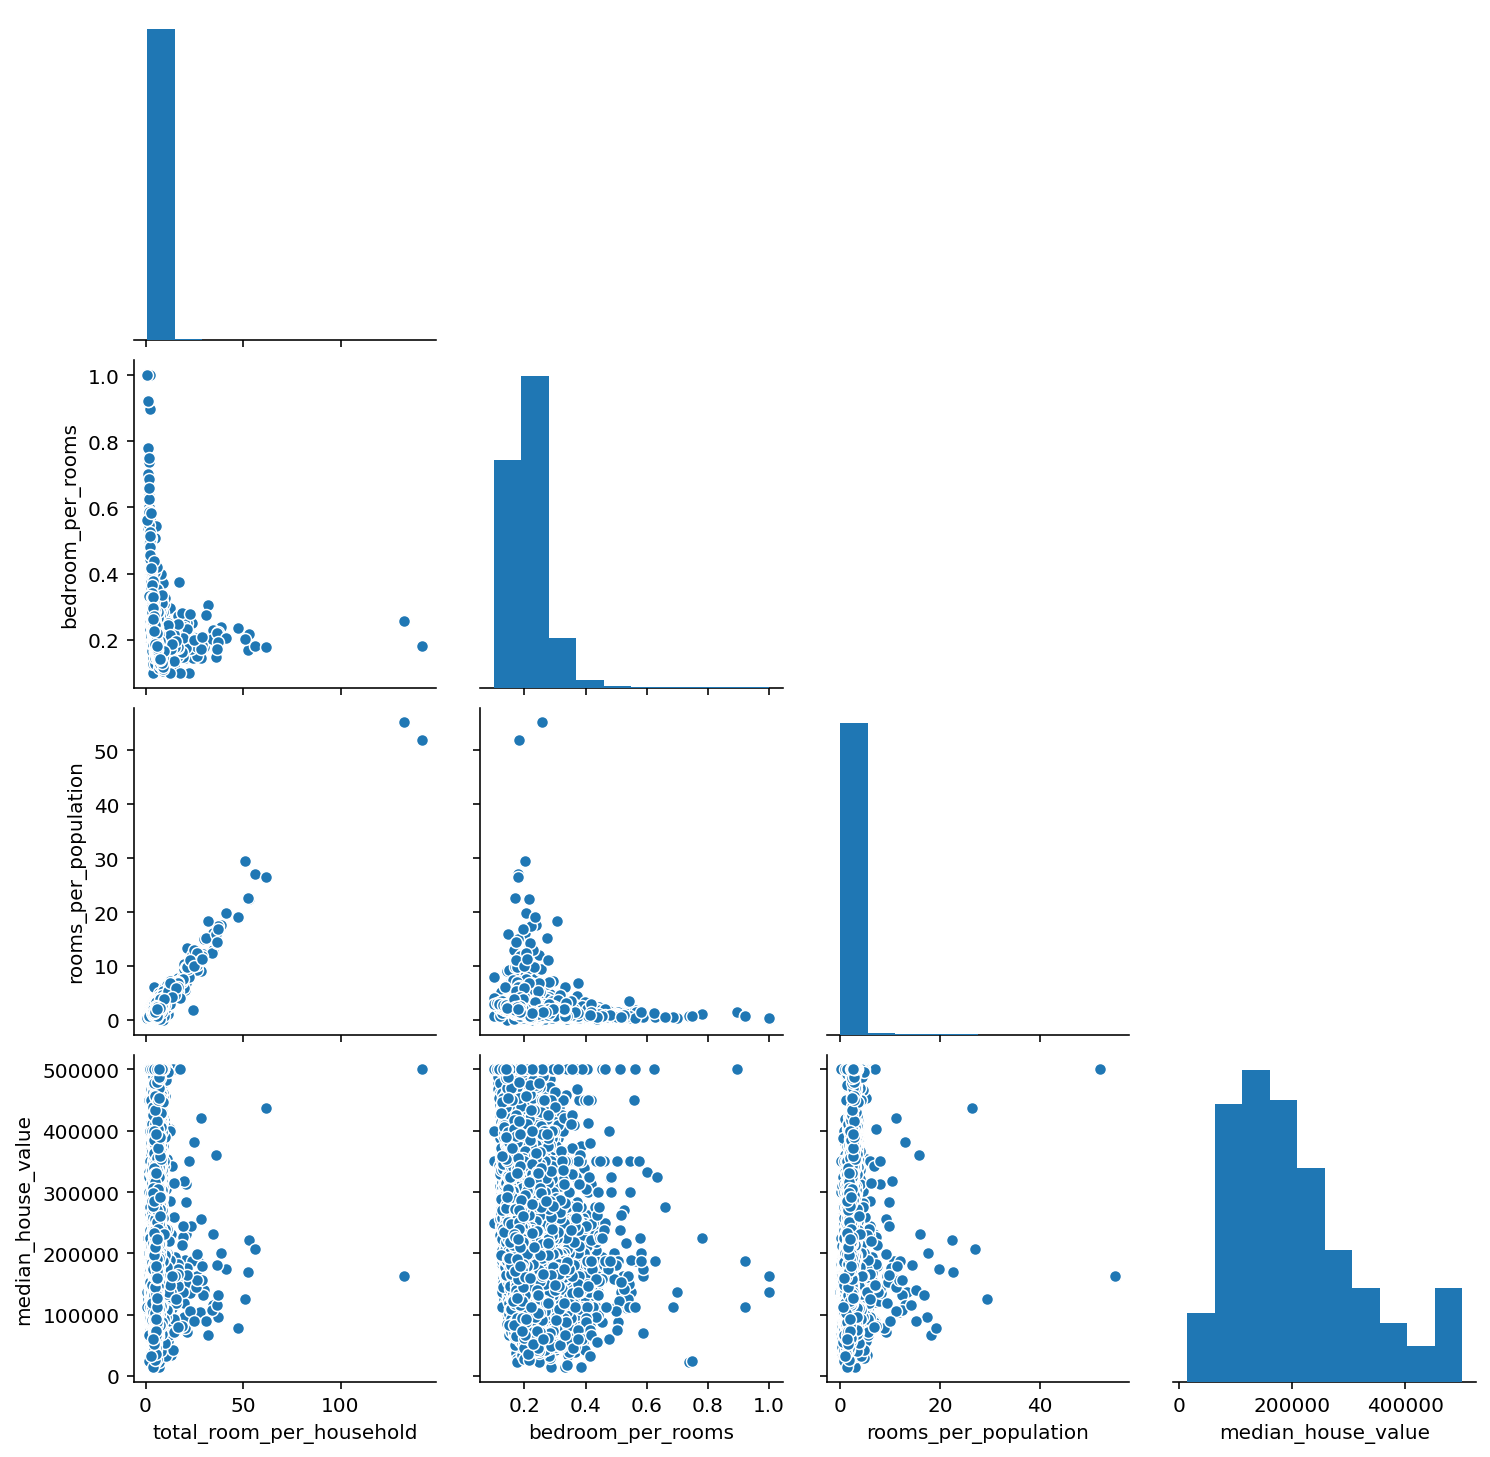

In [ ]:
# 새로운 변수들 
housing['total_room_per_household'] = housing['total_rooms'] / housing['households']
housing['bedroom_per_rooms'] = housing['total_bedrooms'] / housing['total_rooms']
housing ['rooms_per_population'] = housing['total_rooms'] / housing['population']

new_cols = ['total_room_per_household', 'bedroom_per_rooms', 'rooms_per_population', 'median_house_value']
housing[new_cols]

sns.pairplot(housing[new_cols], corner = True)

In [ ]:
housing.corr().abs()['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687593
bedroom_per_rooms           0.253546
rooms_per_population        0.216939
latitude                    0.150820
total_room_per_household    0.149907
total_rooms                 0.133211
housing_median_age          0.110051
households                  0.064321
total_bedrooms              0.048242
longitude                   0.041847
population                  0.025526
Name: median_house_value, dtype: float64

#### (3) Scaling

[문제]
1. 스케일이 작은 feature가 상대적으로 가까워보임
2. 최적화 학습문제(학습속도문제)


##### 직접하기 

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_room_per_household,bedroom_per_rooms,rooms_per_population
count,15480.000000,15480.000000,15480.000000,15480.000000,15334.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15334.000000,15480.000000
mean,-119.592174,35.661287,28.684755,2622.461563,534.918873,1413.539083,496.246059,3.870908,206259.116021,5.442675,0.212809,1.981981
std,2.008460,2.145922,12.595153,2163.788201,416.257526,1092.989687,377.662311,1.891739,115554.739065,2.578256,0.057747,1.135735
min,-124.350000,32.550000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.888889,0.100000,0.002547
25%,-121.810000,33.940000,18.000000,1447.750000,295.000000,785.000000,279.000000,2.563850,118375.000000,4.449878,0.175476,1.526699
50%,-118.540000,34.270000,29.000000,2119.000000,432.000000,1158.000000,407.000000,3.543550,179100.000000,5.235770,0.203170,1.942638
75%,-118.010000,37.730000,37.000000,3120.000000,642.750000,1711.000000,599.000000,4.748350,263800.000000,6.056917,0.239386,2.297232
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,55.222222


In [ ]:
minmax_housing = (housing[numerical_columns] - housing[numerical_columns].min(axis = 0)) / \
(housing[numerical_columns].max(axis=0)-housing[numerical_columns].min(axis=0))
minmax_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15480.000000,15480.000000,15480.000000,15480.000000,15334.000000,15480.000000,15480.000000,15480.000000,15480.000000
mean,0.473887,0.330988,0.542838,0.066648,0.085844,0.086526,0.092279,0.232480,0.394349
std,0.200046,0.228290,0.246964,0.055033,0.067052,0.067046,0.070512,0.130463,0.238256
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.252988,0.147872,0.333333,0.036771,0.047197,0.047970,0.051718,0.142339,0.213146
50%,0.578685,0.182979,0.549020,0.053843,0.069265,0.070850,0.075616,0.209904,0.338351
75%,0.631474,0.551064,0.705882,0.079302,0.103214,0.104772,0.111464,0.292993,0.512990
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


((array([-3.91728489, -3.69792144, -3.57774746, ...,  3.57774746,
          3.69792144,  3.91728489]),
  array([  0.88888889,   1.        ,   1.13043478, ...,  61.8125    ,
         132.53333333, 141.90909091])),
 (1.623264366593287, 5.4426751527793416, 0.6294664820813334))

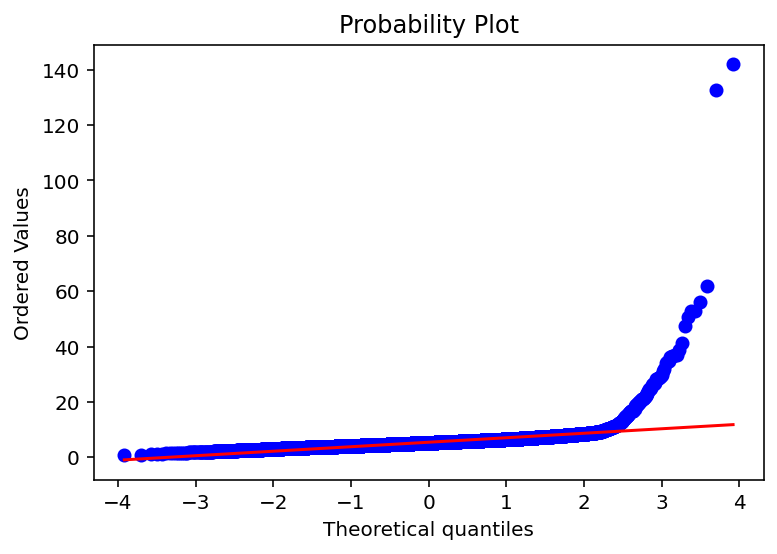

In [ ]:
from scipy import stats
stats.probplot(housing['total_room_per_household'], plot=plt)

#모든 값을 0과 1사이로 표현하다보니, 이상치가 있을 때 스케일이 과도해짐

In [ ]:
# starndaridization

housing_standard = (housing[numerical_columns]-housing[numerical_columns].mean(axis =0)) \
/ housing[numerical_columns].std(axis=0)

In [ ]:
housing_standard.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.533400e+04,1.548000e+04,1.548000e+04,1.548000e+04,1.548000e+04
mean,-1.523579e-13,-4.873462e-14,-2.332329e-17,-4.929472e-17,9.563492e-17,-6.101117e-17,-2.772868e-18,-1.442545e-14,-2.092247e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.368893e+00,-1.449860e+00,-2.198048e+00,-1.211053e+00,-1.280262e+00,-1.290533e+00,-1.308698e+00,-1.781962e+00,-1.655147e+00
25%,-1.104242e+00,-8.021201e-01,-8.483227e-01,-5.428958e-01,-5.763713e-01,-5.750641e-01,-5.752389e-01,-6.909293e-01,-7.605410e-01
50%,5.238710e-01,-6.483400e-01,2.502911e-02,-2.326760e-01,-2.472481e-01,-2.337983e-01,-2.363118e-01,-1.730461e-01,-2.350325e-01
75%,7.877548e-01,9.640209e-01,6.601941e-01,2.299386e-01,2.590491e-01,2.721535e-01,2.720789e-01,4.638282e-01,4.979535e-01
max,2.629963e+00,2.930542e+00,1.851128e+00,1.695986e+01,1.363358e+01,1.362452e+01,1.287328e+01,5.883048e+00,2.542015e+00



##### Sklearn이용 scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
std_scaler = StandardScaler()
std_scaler.fit(housing[numerical_columns])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
std_scaler.transform(housing[numerical_columns])

array([[-1.33331666,  1.22036044,  0.66021542, ..., -0.51435457,
        -0.63917223, -0.60630468],
       [ 0.95209059, -0.94661077, -1.00714653, ...,  1.6649113 ,
         0.03070924, -0.54659079],
       [-1.25863015,  1.03861447,  0.10442811, ...,  0.49716374,
         0.13432096,  0.43998651],
       ...,
       [ 0.31974479, -0.69962265, -0.61015559, ..., -0.22837557,
         1.41149396,  0.73769054],
       [-1.07938252,  0.54463824, -0.05436827, ..., -0.56201773,
        -0.10657629,  0.0410285 ],
       [ 0.43426411, -0.64370081, -0.92774834, ..., -0.11980947,
         0.83258992,  0.15266751]])

In [ ]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit_transform(housing[numerical_columns])

array([[0.20717131, 0.60957447, 0.70588235, ..., 0.05601195, 0.1490945 ,
        0.24989794],
       [0.66434263, 0.11489362, 0.29411765, ..., 0.2096714 , 0.23648639,
        0.26412468],
       [0.22211155, 0.56808511, 0.56862745, ..., 0.12733383, 0.25000345,
        0.49917526],
       ...,
       [0.53784861, 0.1712766 , 0.39215686, ..., 0.07617625, 0.41662184,
        0.5701028 ],
       [0.25796813, 0.45531915, 0.52941176, ..., 0.05265123, 0.2185763 ,
        0.40412411],
       [0.56075697, 0.18404255, 0.31372549, ..., 0.08383122, 0.34109874,
        0.43072194]])

####(4) 범주형자료 처리 _인코딩

##### 직접하기

In [ ]:
#label Encoding

housing['ocean_proximity'].value_counts()

<1H OCEAN     6745
INLAND        4996
NEAR OCEAN    2005
NEAR BAY      1729
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing['ocean_proximity'].values.shape , housing[['ocean_proximity']].values.shape

((15480,), (15480, 1))

In [ ]:
arr, idx = housing['ocean_proximity'].factorize()
np.unique(arr)
# arr = pd.DataFrame(arr)
# arr[0].value_counts()
housing['ocean_proximity_label'] = arr
idx

Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')

In [ ]:
# OneHot Encoding

pd.get_dummies(housing['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9902,0,0,0,1,0
10351,1,0,0,0,0
1600,0,0,0,1,0
16549,0,1,0,0,0
4096,1,0,0,0,0
...,...,...,...,...,...
19260,1,0,0,0,0
18894,0,0,0,1,0
20363,1,0,0,0,0
9723,1,0,0,0,0


##### Sklearn Encoding

In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()
label.fit(housing['ocean_proximity'])

LabelEncoder()

In [ ]:
label.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [ ]:
sample_label = label.transform(housing['ocean_proximity'])
sample_label

array([3, 0, 3, ..., 0, 0, 0])

In [ ]:
label.inverse_transform(sample_label)

array(['NEAR BAY', '<1H OCEAN', 'NEAR BAY', ..., '<1H OCEAN', '<1H OCEAN',
       '<1H OCEAN'], dtype=object)

In [ ]:
#OneHotEncoder 
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()

onehot_encoded = onehot.fit_transform(housing[['ocean_proximity']])
# onehot_encoded = onehot.fit_transform(housing['ocean_proximity'].values.reshape(-1, 1))

In [ ]:
onehot.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:

onehot_encoded.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

#### (5) Pipeline

- 데이터 준비과정을 모두 파이프라인으로 연결

In [ ]:
from sklearn.pipeline import Pipeline #데이터별 파이프라인 만들기 
from sklearn.compose import ColumnTransformer #전체 파이프라인 연결 

##### Numeric Pipeline

- N/A값 대체 (imputer)
- 특성 조합 > 새로운 feature 만들기
- 스케일

In [ ]:
# 특성조합 클래스 만들기

In [ ]:
housing.columns

#새로운 feature만드는것까지 Pipeline에 들어가야 하므로 원래 데이터의 numeric col가져오기

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', 'total_room_per_household',
       'bedroom_per_rooms', 'rooms_per_population', 'ocean_proximity_label'],
      dtype='object')

In [ ]:
# numeric columns 만들기
housing_sample = housing_origin.copy()
housing_sample.drop('median_house_value' , axis =1, inplace = True) #target 떼어내기
housing_sample.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [ ]:
numeric_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
        'median_income_rank']

total_room_idx, total_bedroom_idx, population_idx, house_hold_idx = 3, 4, 5, 6


In [ ]:
# 변환기 만들기
# fit과 transform
from sklearn.base import BaseEstimator, TransformerMixin

rooms_idx, bedrooms_idx, population_idx, household_idx = 3, 4, 5, 6
class CombineAttrs(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    #fit은 반드시 자기자신을 리턴 > sklearn의 약속, parameter 줄게 없으니까 그냥 반환
    #y가 default로 들어와서 none을 준것 (*args 쓰리고 나옴)
    
    def transform(self, X, y=None):  # transform의 결과가 numpy array이므로 array로 해줘야 함. 
        rooms_per_household = X[:, rooms_idx] / X[:, household_idx]
        population_per_household = X[:, population_idx]/X[:, household_idx]
        
        room_per_population =  X[:, rooms_idx] / X[:, population_idx]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_idx] / X[:, rooms_idx]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room, room_per_population] #np.c_: concat해주는 것, 2차원에 col이 하나 더 생기는 것
        else:
            return np.c_[X, rooms_per_household, population_per_household, room_per_population]

In [ ]:
CombineAttrs(add_bedrooms_per_room=False).fit_transform(housing_sample[numeric_columns].values)


KeyError: ignored

In [ ]:
# Numeric 파이프라인 만들기 

numeric_pipeline = Pipeline([
                             ('imputer', SimpleImputer(strategy='median')),
                             ('comb_attrs', CombineAttrs(add_bedrooms_per_room=True)),
                              ('scaler', StandardScaler())
])

In [ ]:
housing = X_train.copy()
scaled_numeric = numeric_pipeline.fit_transform(
    housing.drop('ocean_proximity', axis=1)
    )
scaled_numeric.shape

(15480, 14)

##### 범주형 파이프라인

In [ ]:
cgr_pipeline = Pipeline([
                         ('onehot', OneHotEncoder())
])

In [ ]:
cgr_pipeline.fit_transform(housing[['ocean_proximity']])

<15480x5 sparse matrix of type '<class 'numpy.float64'>'
	with 15480 stored elements in Compressed Sparse Row format>

##### 전체파이프라인 

In [ ]:
numeric_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
cgr_columns = ['ocean_proximity']

In [ ]:
df_pipeline = ColumnTransformer([
                                 ('num_pipeline', numeric_pipeline, numeric_columns),
                                 ('cgr_pipeline', cgr_pipeline, cgr_columns)
  
])

In [ ]:
df_pipeline.fit_transform(X_train).shape

(15480, 17)

##### 원본데이터로 파이프라인 fit_transform하기

In [ ]:
housing = housing_origin.copy()

housing['median_income_rank'] = np.ceil(housing['median_income'])
housing['median_income_rank'] = housing['median_income_rank'].\
    where(housing['median_income_rank']<10, 10)

X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=housing['median_income_rank'])
X_train.drop('median_income_rank', axis=1,  inplace=True)
X_test.drop('median_income_rank', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [ ]:
X_train_ready = df_pipeline.fit_transform(X_train)

## GridSearch

GridSearch 
- 조합을 주고 다 해보는 것
- 파라미터가 많아지면 best 조합을 찾기 편함

RandomSearch
- 어느 정도 범위를 주고 랜덤하게 탐색시키는 것

In [ ]:
X_train_ready.shape

(15480, 17)

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha' : [0.01, 0.1, 1, 10, 100]
}
grid_search = GridSearchCV(Ridge(), param_grid = param_grid, cv = 10, n_jobs = -1, scoring = 'neg_mean_squared_error')
grid_search

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

n_job: 각 cpu에 각각 다른 모델을 병렬로 학습시키는 것  
전체 Cpu 중에 몇 개를 쓸래?

- n_jobs = -1; 가용할 수 있는 cpu 전부 사용


In [ ]:
grid_search.fit(X_train_ready, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
grid_search.best_params_

{'alpha': 100}

In [ ]:
grid_search.best_score_

-5043734006.676992

In [ ]:
#best 모델
model = grid_search.best_estimator_
model

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
np.sqrt(-grid_search.best_score_)

71019.25095829293

In [ ]:
housing_origin.describe()['median_house_value']

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

## 수업필기 


#### 1.Regression

일반적으로  Regression은 선 하나를 그려서 데이터를 표현하는 것  
어떤 선이 최적인지 찾는 것 -> 판단 기준은? 
  - MAE(Mean Absolute Error): 실제값과 예측값의 차이의 절댓값의 평균(에러의 절댓값의 평균)
  - MSE(=RMSE) : 에러 제곱의 평균
  

Why MSE?  
거리가 먼 것에 더 큰 패널티!  큰 에러를 최대한 줄이자
단점: 이상치가 많을 경우 문제 발생
-> MAE 사용 or 이상치 제거 필요 

##### 2. 왜 Train/Test를 나누고 결측치 처리를 할까?


- N/A 값을 채울 때, Train_set에 대해서 대표값을 정한다
- 실제 test set에서 모델 평가를 할 때, Train_set에서 정한 대표값으로 N/A값을 채운다. 
  - 이유: 우리가 학습시킨 ML모델은 TrainSet에 대한 대표값을 기준으로 학습을 시킨 모델이기 때문
  - 같은 이유로 새로운 데이터(실제 예측하고자 하는 값)에 대해서도 기존 train_set에 대한 대표값을 채우고 예측한다. 

##### iternable


반복가능한 객체
- list
- dic
- zip: zip이라는 객체가 따로 있음

##### dir()
안쪽에 있는 함수를 볼수 있음

In [ ]:
housing.iloc[:, :4]

import seaborn as sns
dir(sns.factorplot)

##### pandas는 Numpy를 기반으로 한다 

##### axis는 몇 번쨰 배열을 기준으로 할 것인가에 대한 것

- axis = 0: 가장 바깥쪽 배열 차원
- axis = 1: 하나 들어간 배열 차원
- axis = 2: 마지막 원소배열

##### sklearn

딥러닝 제외하면 머신러닝의 거의 대부분 sklearn이 커버해줌
- sklearn.pipeline 주로 쓸 거임
- base.BaseEstimator
- base.TransformerMixin 
https://scikit-learn.org/stable/

Sklearn_ Calss 크게 2 종류
- 변환기: 어떤 값들을 바꿔주는 것;  
 na값 바꿔주는 것 > imputer package
- 예측기: 모델 : linear model, ...

대부분의 sklearn 클래스(객체)들은 fit이라는 메소드를 가진다

fit은 파라미터를 만드는 메서드이다
변환기에는 transform, Estimator에는 predict라는 메서드가 있다.

transform은 fit에서 만든 파라미터를 이용해 기존 데이터를 변형시키는 역할을 한다
predict는 fit에서 만든 파라미터를 이용해 새로운 데이터를 예측하는 역할을 한다.

parameter: sklearn이 스스로 만드는 것
parameter는 항상 언더바를 붙인다!

##### reshape

In [ ]:
arr = np.arange(9).reshape(3,3)
arr

In [ ]:
arr.reshape(9, 1)

In [ ]:
arr.reshape(-1, 1)